In [63]:
%reload_ext autoreload
%autoreload 2

from brian2 import *
from plotlib import *
from tqdm import tqdm
from pci import *

import experiment_10_full_ping_connectome as ex10
import experiment_11_TMS as ex11


In [47]:
start, end = 1000, 5000
dt, shift = 5, 5
n_mod = 1000

data = ex11.run_experiment(n_mod=n_mod)

Setting up synapses... 
	EX_IN_SYN... (279,752 synapses) [23.66s]
	IN_EX_SYN... (399,200 synapses) [28.79s]
	IN_IN_SYN... (99,800 synapses) [3.82s]
	INTER_EX_EX_SYN... (5,715,001 synapses) [34.05s]
	TMS stimulus... (50 synapses) [0.90s]
All synapses created [91.25s]
Supplying Poisson input to network...  [0.00s]
Running sym...  [176.73s]


In [48]:
pre, post = pci(data, dt, shift)

In [49]:
print("Resting state mean: {:.2f}, standard deviation: {:.2f}".format(pre.mean(), pre.std()))

total, above_std = len(pre), len(pre[pre > pre.mean() + 2 * pre.std()])
print(total, above_std, float(above_std)/total)
total, above_std = len(post), len(post[post > post.mean() + 2 * post.std()])
print(total, above_std, float(above_std)/total)

Resting state mean: 1.15, standard deviation: 1.14
(99800, 3143, 0.03149298597194389)
(59880, 1876, 0.03132932531730127)


5,733,059 exc spikes, 5,533,002 inh spikes
(800, 3200, 900, 3600)
[3474 3369 3392 3443 3478 3366 3364 3362 3360 3384]
[865 864 861 868 863 841 840 843 848 866]


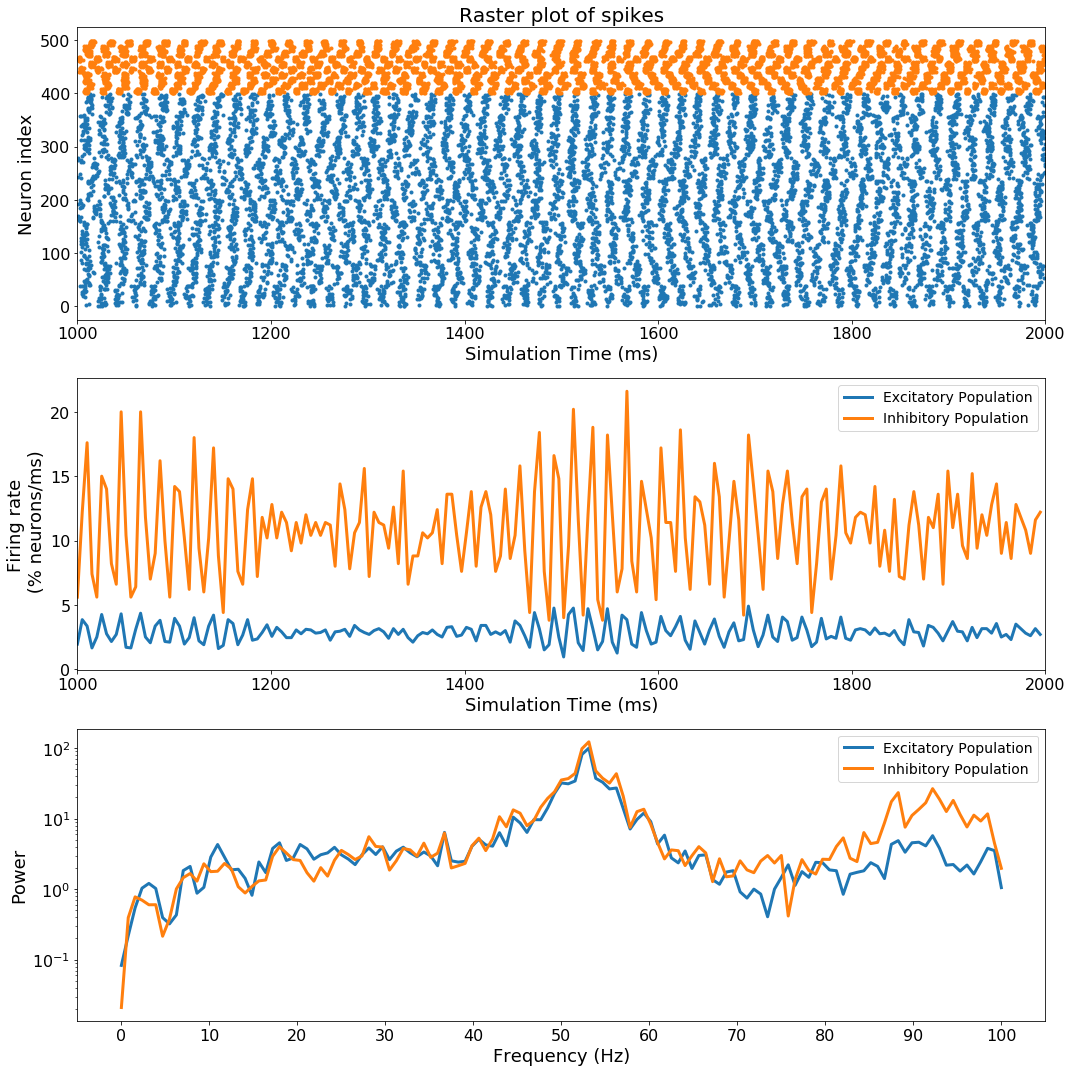

In [60]:
plot_stuff(data, min_mod=80, max_mod=90)

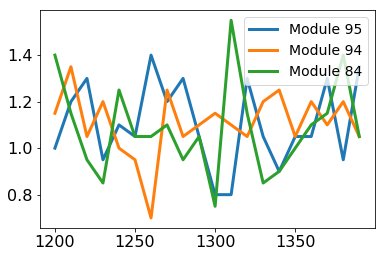

In [69]:
mods = [95, 94, 84]
plot_modules(data, mods, start=1200, end=1400)
